In [3]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

import typing
import keras

In [4]:

def plot_multiple_histories(histories : typing.Dict, metric='loss'):
  """
  Plots the training history of multiple models on the same plot for comparison.
  
  Parameters:
    histories: List of History objects from multiple model's fit() calls.
    metric: The metric to plot ('loss', 'accuracy', etc.).
    labels: List of labels for the models. If None, defaults to 'Model 1', 'Model 2', etc.
  """
  # Check if labels are provided, otherwise generate default labels
  # if labels is None:
  #   labels = [f'Model {i+1}' for i in range(len(histories))]
  
  # Initialize the plot
  plt.figure(figsize=(10, 6))
  
  # Loop through each history and plot the metrics
  for i, (label, history) in enumerate(histories.items()):
    epochs = range(1, len(history.history[metric]) + 1)
    
    # Plot training metric
    plt.plot(epochs, history.history[metric], label=f'{label} {metric.capitalize()}')
    
    # Plot validation metric if available
    # if f'val_{metric}' in history.history:
    #   plt.plot(epochs, history.history[f'val_{metric}'], '--', label=f'{label} Validation {metric.capitalize()}')
  
  # Add labels and title
  plt.title(f'Comparison of {metric.capitalize()} Between Models')
  plt.xlabel('Epochs')
  plt.ylabel(metric.capitalize())
  plt.legend()
  
  # Show plot
  plt.show()



In [5]:

import sklearn.model_selection
from sklearn.datasets import make_regression

X,y = make_regression(
  n_samples=5000,
  n_features=4,
  n_informative=3,
  noise=2
)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
  X,
  y,
  test_size=0.33,
  random_state=42
)

In [6]:

def train_model_activation(activation_function) -> keras.callbacks.History:

  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(shape=(4,)))
  model.add(keras.layers.Dense(1, activation=activation_function))
  
  opt = keras.optimizers.SGD(learning_rate=0.001)
  model.compile(optimizer=opt, loss='mse', metrics=['mae'])
  history = model.fit(
    X_train, 
    y_train,
    batch_size=32, 
    epochs=40, 
    validation_split=0.3
  )

  return history



2024-10-09 10:15:53.802303: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-10-09 10:15:53.802358: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-10-09 10:15:53.802378: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-10-09 10:15:53.802420: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-09 10:15:53.802448: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/40


2024-10-09 10:15:54.525738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4724.9204 - mae: 55.4999 - val_loss: 4201.9668 - val_mae: 51.2647
Epoch 2/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4218.6680 - mae: 52.1696 - val_loss: 3831.0728 - val_mae: 48.5933
Epoch 3/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3890.5837 - mae: 48.8115 - val_loss: 3550.6155 - val_mae: 46.3734
Epoch 4/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3359.4692 - mae: 45.5045 - val_loss: 3331.5129 - val_mae: 44.4880
Epoch 5/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3288.6326 - mae: 44.4549 - val_loss: 3160.0779 - val_mae: 42.8663
Epoch 6/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3072.6101 - mae: 42.7192 - val_loss: 3026.5757 - val_mae: 41.5010
Epoch 7/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2917.1748 - mae: 41.3623 - val_loss: 2921.5564 - val_mae: 40.3527
Epoch 8/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2979.2874 - mae: 40.8633 - val_loss: 2836.6921 - val_mae: 39.3624
Epoch 9/40


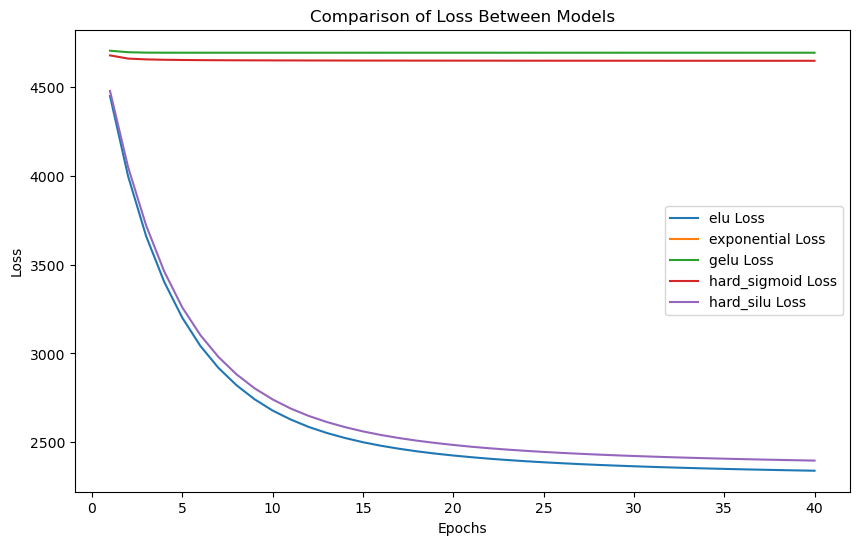

In [7]:
activation_functions = [func for func in dir(keras.activations)
                        if callable(getattr(keras.activations, func)) and not func.startswith(('deserialize', 'serialize', 'get'))]

plot_multiple_histories(
  histories={
    f"{f}" : train_model_activation(f)
    for f in activation_functions[:5]
  }
)